# (Micro)relatório de Mineração de Dados 1
## Relatório Descritivo de Dataset

**Membros da equipe:** 

- Ricardo Cavalcante (377744)
- Tales Araujo dos Santos (374953)

Fonte do dataset: https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020

## Um pouco sobre League of Legends e sobre este notebook

League of Legends (LoL) é um jogo multiplayer, modo arena de batalha, desenvolvido pela empresa Riot Games, onde o objetivo final é destruir a base inimiga. O mapa contém diversos objetivos que podem vatagens aos que os fizerem, como:

- **Tropas (Minions):** Tropas são unidades associadas a um dos times controladas pelo computador. Elas surgem periodicamente do próprio nexus e avançam pelas rotas em direção ao nexus inimigo. As tropas inimigas garantem ouro ao jogador que a abateu.

- **Dragões, Rubrivira (Red/Vermelho), Azuporã (Blue/Azul) e Barão (Baron Nashor):** Ficam situados na Jungle e garantem buffs nos status e experiência de nível quando que o abatidos.

- **Trevoguari (Lobos),  Grompe (Sapão), Acuâmina (Galinha) e Krugues (Pedras):** Ficam situados na Jungle e garantem experiência de nível quando abatidos.

- **Aronguejo (Caranguejo):** Ficam situados nos rios e garantem experiência de nível e visão no mapa quando abatidos.

- **Torres:** Liberam um espaço na rota até o nexus inimigo quando destruida.

- **Inibitor:** Quando destruida libera minnions inimigos mais poderosos na rota a qual esse inibidor era responsável.

- **Nexus:** Garante a vitória ao time que o destroiu.

Além disso o jogo conta com mais de 160 personagens jogáveis, cada um com um kit de habilidades diferente e status base unicos, e as partidas contam com 10 jogadores simultâneos, sendo 5 do time azul e cinco do time vermelho, cada um com uma função pré definida e responsável por defender uma área do mapa.

**Representação do minimapa com as principais localizações:**
![alt text](https://s2.glbimg.com/7YyoN-q2hqslIYiSD5I_aWrmXlE=/0x0:1600x1337/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_08fbf48bc0524877943fe86e43087e7a/internal_photos/bs/2018/j/U/wOtnlBRQOqIM2D4UZnqQ/mapa1-marca.jpg "Logo Title Text 1")


O jogo também tem um sistema de rankeamento baseado em divisões e de pontos (chamados de pontos de liga ou PDL). Os pontos de liga são distribuídos aos jogadores de forma que eles ganham PDL caso vençam e perdem PDL caso percam a partida. As três mais altas divisões são:

- Desafiante (Challenger)
- Grão Mestre (Grand Master)
- Mestre (Master)

Os meios de se sobrepor perante o inimigo e triunfar no campo de batalha são diversos e o jogo acaba por se tornar uma mistura entre habilidade individual e estratégia. Neste notebook estaremos realizando uma análise focada nos quesitos estratégicos nos rankings mais altos do jogo para descobrir quais são os fatores mais impactantes em uma partida para garantir a vitória!

In [140]:
# Download do dataset (Kaggle)
# !mkdir ~/.kaggle
# !echo "{\"username\":\"username\",\"key\":\"key\"}" > ~/.kaggle/kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json

#!kaggle datasets download gyejr95/league-of-legends-challenger-ranked-games2020

# !unzip league-of-legends-challenger-ranked-games2020.zip -d lol_data
# !rm league-of-legends-challenger-ranked-games2020.zip

In [141]:
# Final file structure
!ls -la

total 1520
drwxrwxr-x 4 talesaraujo talesaraujo    4096 ago  9 22:15 .
drwxrwxr-x 4 talesaraujo talesaraujo    4096 ago  9 21:39 ..
-rw-rw-r-- 1 talesaraujo talesaraujo      30 ago  9 21:39 .gitignore
drwxrwxr-x 2 talesaraujo talesaraujo    4096 ago  9 21:41 .ipynb_checkpoints
-rw-rw-r-- 1 talesaraujo talesaraujo 1382990 ago  9 22:15 lol_challenger_ranked.ipynb
drwxrwxr-x 2 talesaraujo talesaraujo    4096 ago  9 14:28 lol_data
-rw-rw-r-- 1 talesaraujo talesaraujo  150884 ago  9 21:39 mapa1-marca.webp


In [142]:
# Importing libraries needed to perform the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# File directory in which the data used will be located
DATAPATH = 'lol_data'

O dataset escolhido contêm informações de partidas das três mais altas divisões:

In [143]:
c_df = pd.read_csv(f'{DATAPATH}/Challenger_Ranked_Games.csv')
gm_df = pd.read_csv(f'{DATAPATH}/GrandMaster_Ranked_Games.csv')
m_df = pd.read_csv(f'{DATAPATH}/Master_Ranked_Games.csv')

Uma vez em que os atributos são os mesmos, preferimos por unificar os três datasets em um só e criar uma nova coluna apenas com o *ranking* de cada partida

In [144]:
challenger_series = pd.Series(['challenger' for i in range(c_df.shape[0])])
grandmaster_series = pd.Series(['grandmaster' for i in range(gm_df.shape[0])])
master_series = pd.Series(['master' for i in range(m_df.shape[0])])

c_df['ranking'] = challenger_series
gm_df['ranking'] = grandmaster_series
m_df['ranking'] = master_series

frames = [c_df, gm_df, m_df]

df = pd.concat(frames)
df.reset_index(inplace=True, drop=True)

Foi necessário também criar uma nova coluna com a duração das partidas em minutos para que pudessemos realizar as analises que desejávamos com maior facilidade:

In [145]:
df.rename(columns={"gameDuraton": "gameDuration"}, inplace=True)

# Adding a column to keep track of game duration in minutes
df.insert(loc=2, column='gameDurationMins', value=round(df['gameDuration']/60))

rankings = df['ranking']
df.drop(labels=['ranking'], axis=1, inplace=True)
df.insert(1, 'ranking', rankings)

## Analisando a presença de dados faltantes

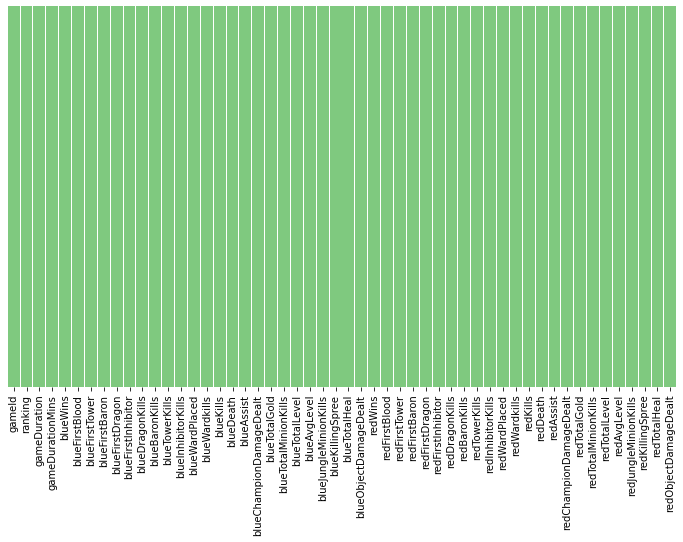

In [146]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Accent')

Felizmente o dataset em questão possui toda a completude de seus atributos. Entretanto, verificamos por análises pontuais que possuía algumas inconsistências em relação aos seus atributos e sua real condição de existência (e impacto) na partida. 

## Barão antes dos 20?

Descobrimos dados errôneos nas colunas referentes ao objetivo "Barão", uma vez que tinham partidas com menos de 20 minutos de duração que já haviam barons abatidos e em uma partida normal ele só aparece no mapa e fica disponível para ser abatido após esses 20 minutos.

Logo tivemos que remover as linhas que continham essas informações.

In [147]:
# Selecting attributes to perform dropping
columns = ['blueFirstBaron', 'redFirstBaron', 'blueBaronKills', 'redBaronKills']

# Dropping by interating over array (and updating dataframe at the same time)
for column in columns:
    column_logical_values = np.logical_and(df['gameDurationMins'] < 20, df[column] == 1)
    column_indexes = [i for i, value in enumerate(column_logical_values) if value]
    df.drop(df.index[[column_indexes]], inplace=True)
    df.reset_index(drop=True, inplace=True)

In [148]:
# Manual check in order to see if there is any inconsistency related to early barons
blue_f_baron = np.logical_and(df['gameDurationMins'] < 20, df['blueFirstBaron'] == 1).sum()
red_f_baron = np.logical_and(df['gameDurationMins'] < 20, df['redFirstBaron'] == 1).sum()
blue_baron_kills = np.logical_and(df['gameDurationMins'] < 20, df['blueBaronKills'] == 1).sum()
red_baron_kills = np.logical_and(df['gameDurationMins'] < 20, df['redBaronKills'] == 1).sum()

print(blue_f_baron, red_f_baron, blue_baron_kills, red_baron_kills)

0 0 0 0


Outra inconsistência encontrada tem relação com o **nível médio dos jogadores**. Sabemos que em uma partida normal o seu nível máximo é 18, ou seja, não poderá haver médias superiores a este número (para os dois times). Podemos ver com mais facilidade a inconsistência e seu impacto sobre os dados, por exemplo, no lado Azul:

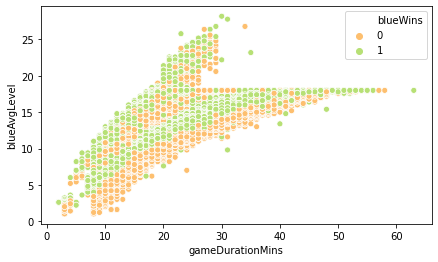

In [149]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x=df['gameDurationMins'], y=df['blueAvgLevel'], hue=df['blueWins'], palette="RdYlGn")

In [150]:
# Manually removing wrong labeled levels
df = df[df['blueAvgLevel'] <= 18]
df = df[df['redAvgLevel'] <= 18]
df.reset_index(inplace=True, drop=True)

## Legenda sobre os atributos

- **GameId:** Número único atrelado a toda a partida de League of Legends
- **Ranking:** Divisão (ELO) da partida
- **gameDuration:** Duração da partida em segundos
- **gameDurationMins:** Duração da partida em minutos
---------------------------------------
#### Dados sobre o time azul
- **blueWins:** Registra se a partida foi vitória ou derrota para o time azul (Derrota = 0, Vitória = 1)
- **blueFirstBlood:** Registra se o time azul matou o primeiro inimigo na partida.
- **blueFirstTower:** Registra se o time azul destruiu a primeira torre na partida.
- **blueFirstBaron:** Registra se o time azul abateu o primeiro Baron Nashor na partida.
- **blueFirstDragon:** Registra se o time azul abateu o primeiro Dragão na partida.
- **blueFirstInhibitor:** Registra se o time azul abateu o primeiro inibidor na partida.
- **blueDragonKills:** Contabiliza quantos dragões foram abatidos pelo time azul.
- **blueBaronKills:** Contabiliza quantos Barons Nashor foram abatidos pelo time azul.
- **blueTowerKills:** Contabiliza quantas torres foram destruidas pelo time azul.
- **blueInhibitorKills:** Contabiliza quantos inibidores foram destruidas pelo time azul.
- **blueWardPlaced:** Contabiliza quantas sentinelas foram colocadas pelo time azul.
- **blueWardkills:** Contabiliza quantas sentinelas inimigas foram destruidas pelo time azul.
- **blueKills:** Contabiliza quantos inimigos foram abatidos pelo time azul.
- **blueDeath:** Contabiliza quantos aliados do time azul foram mortos.
- **blueAssist:** Contabiliza quantas assistencias (colaborações para abates de inimigos) do time azul ocorreram.
- **blueChampionDamageDealt:** Contabiliza o total de dano causado a campeões inimigos pelo time azul.
- **blueTotalGold:** Contabiliza o total de ouro adquirido pelo time azul.
- **blueTotalMinionKills:** Contabiliza o total de tropas abatidas pelo time azul.
- **blueTotalLevel:** Contabiliza o total de níveis conquistados pelo time azul.
- **blueAvgLevel:** Contabiliza a média de níveis conquistados pelo time azul.
- **blueJungleMinionKills:** Contabiliza os (objetivos+tropas) abatidos pelo Jungle time azul.
- **blueKillingSpree:** Contabiliza a ocorrência de killingSpree (Quando um jogador mata 3 inimigos ao logo da partida sem morrer) do time azul.
- **blueTotalHeal:** Contabiliza o total de vida curada pelo time azul.
- **blueObjectDamageDealt:** Contabiliza o total de dano causado a estruturas (Torres, inibidores e nexus) pelo time azul.
---------------------------------------
#### Dados sobre o time vermelho

- **redWins:** Registra se a partida foi vitória ou derrota para o time vermelho (Derrota = 0, Vitória = 1)
- **redFirstBlood:** Registra se o time vermelho matou o primeiro inimigo na partida.
- **redFirstTower:** Registra se o time vermelho destruiu a primeira torre na partida.
- **redFirstBaron:** Registra se o time vermelho abateu o primeiro Baron Nashor na partida.
- **redFirstDragon:** Registra se o time vermelho abateu o primeiro Dragão na partida.
- **redFirstInhibitor:** Registra se o time vermelho abateu o primeiro inibidor na partida.
- **redDragonKills:** Contabiliza quantos dragões foram abatidos pelo time vermelho.
- **redBaronKills:** Contabiliza quantos Barons Nashor foram abatidos pelo time vermelho.
- **redTowerKills:** Contabiliza quantas torres foram destruidas pelo time vermelho.
- **redInhibitorKills:** Contabiliza quantos inibidores foram destruidas pelo time vermelho.
- **redWardPlaced:** Contabiliza quantas sentinelas foram colocadas pelo time vermelho.
- **redWardkills:** Contabiliza quantas sentinelas inimigas foram destruidas pelo time vermelho.
- **redKills:** Contabiliza quantos inimigos foram abatidos pelo time vermelho.
- **redDeath:** Contabiliza quantos aliados do time vermelho foram mortos.
- **redAssist:** Contabiliza quantas assistencias (colaborações para abates de inimigos) do time vermelho ocorreram.
- **redChampionDamageDealt:** Contabiliza o total de dano causado a campeões inimigos pelo time vermelho.
- **redTotalGold:** Contabiliza o total de ouro adquirido pelo time vermelho.
- **redTotalMinionKills:** Contabiliza o total de tropas abatidas pelo time vermelho.
- **redTotalLevel:** Contabiliza o total de níveis conquistados pelo time vermelho.
- **redAvgLevel:** Contabiliza a média de níveis conquistados pelo time vermelho.
- **redJungleMinionKills:** Contabiliza os (objetivos+tropas) abatidos pelo Jungle time vermelho.
- **redKillingSpree:** Contabiliza a ocorrência de killingSpree (Quando um jogador mata 3 inimigos ao logo da partida sem morrer) do time vermelho.
- **redTotalHeal:** Contabiliza o total de vida curada pelo time vermelho.
- **redObjectDamageDealt:** Contabiliza o total de dano causado a estruturas (Torres, inibidores e nexus) pelo time vermelho.


A esta altura, vamos dar uma olhada em como os dados estão apresentados:

In [151]:
df.head(5)

,gameId,ranking,gameDuration,gameDurationMins,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,challenger,1323,22.0,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,challenger,1317,22.0,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,challenger,932,16.0,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,challenger,2098,35.0,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,challenger,2344,39.0,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141


### Quantidade de partidas por *ELO* (ranking de partidas ranqueadas) no dataset

À medida em que o ranking aumenta, a quantidade de jogadores diminui, uma vez levada em consideração sua dificuldade. Isto pode ser constatado com uma análise das quantidades de cada um:

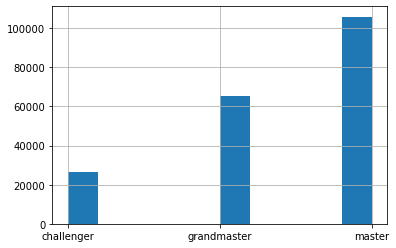

In [152]:
df['ranking'].hist()

In [153]:
# Actual values for each attribute
df['ranking'].value_counts()

master         105891
grandmaster     65238
challenger      26652
Name: ranking, dtype: int64

### Duração de partidas agrupadas por ELO



Podemos ter uma visualização da duração de partidas dividida por ranking. Veja como ela se apresenta:

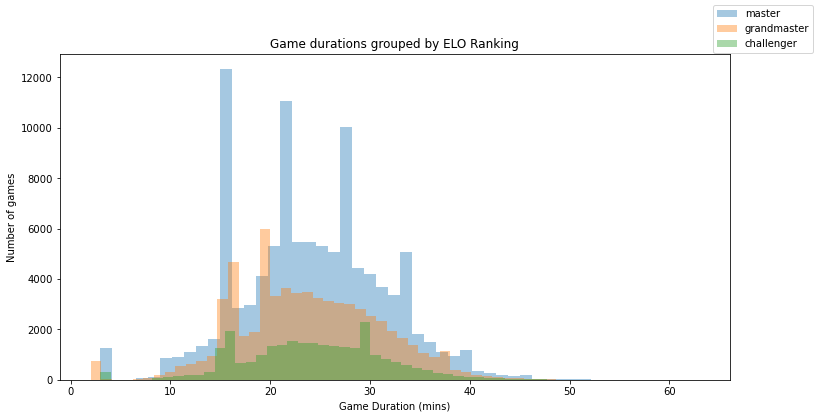

In [154]:
rankings = ['master', 'grandmaster', 'challenger']
game_durations_by_ranking = [df[df['ranking'] == rank]['gameDurationMins'] for rank in rankings]

fig, ax = plt.subplots(figsize=(12, 6))
ax.set(ylabel='Number of games')
for i, game in enumerate(game_durations_by_ranking):
    sns.distplot(game, hist=True, kde=False, axlabel="Game Duration (mins)", label=rankings[i])
ax.set_title("Game durations grouped by ELO Ranking")
fig.legend()
plt.show()

Uma informação interessante que encontramos analisando esse gráfico foi que aproximadamente nos minutos 15, 20 e 30 houve um pico de términos nas partidas.Isso pode se dar pelo fato de que os minutos 15 e 20 são os que liberam a possibilidade de se render e declarar automaticamente a vitória para o time inimigo, para tal, caso um time inicie a votação para se render entre o minuto 15 e o minuto 20 é necessário que todos do time votem a favor, a partir do minuto 20 é necessário apenas que 4 dos cinco jogadores do time que iniciou a votação concordem com a rendição. 

Outra conclusão que tiramos é que, independente do *ranking*, dificilmente as partidas passam dos quarenta minutos de duração.

### Verificando a porcentagem de vitória por lado do mapa

Podemos analisar qual lado é mais vitorioso (que tem a maior probabilidade de vencer), uma vez que não são simetricamente iguais:

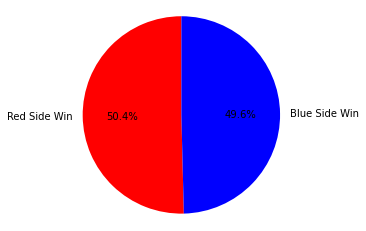

In [155]:
data = df["blueWins"].value_counts()
labels = ["Red Side Win", "Blue Side Win"]

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors='rb')
ax.axis('equal')

plt.show()

Aqui podemos mais uma vez ver a ligeira vantagem do time vermelho para a conquista da vitória em Summoners Rift.

### Verificando a quantidade de vitórias por lado do mapa

In [156]:
# Setting categorical attributes for better visualization
columns = ['redWins', 'blueWins']

win_mapping = {0: "DEFEAT", 1: "WIN"}

for col in columns:
    df[col] = df[col].map(win_mapping)

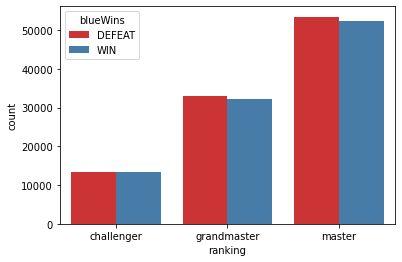

In [157]:
sns.countplot(x=df['ranking'], hue=df['blueWins'], palette="Set1")

## Conquista de vantagem em expepriência e nível é um fator impactante para vitória?

No League of Legends, ao entrar na partida, seu personagem começa no nível 1 e pode chegar até o nível 18 ganhando experiência pelo mapa. 

O nível é um fator importante para a vitória uma vez que ele libera pontos de skills, liberando para o seu personagem novas habilidades e fazendo as habilidades já existentes ficarem mais fortes.

Como podemos podemos ver os times que coletaram mais experiência com o passar do tempo conquistaram mais vitórias.

Neste gráfico não estamos comparando o nível médio dos dois lados em uma mesma partida, mas comparando com outras partidas do mesmo lado.

### Analisando o fator "nível" com as vitórias e derrotas do lado azul com o passar do tempo  

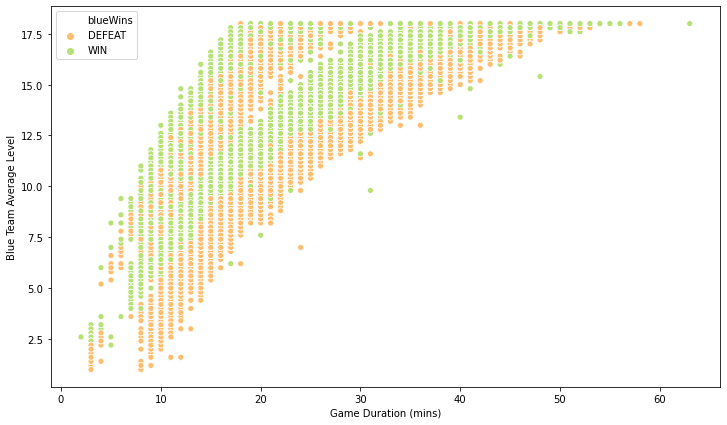

In [158]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['gameDurationMins'], y=df['blueAvgLevel'], hue=df['blueWins'], palette="RdYlGn")
plt.xlabel("Game Duration (mins)")
plt.ylabel("Blue Team Average Level")
plt.show()

### Analisando o fator "nível" com as vitórias e derrotas do lado vermelho com o passar do tempo

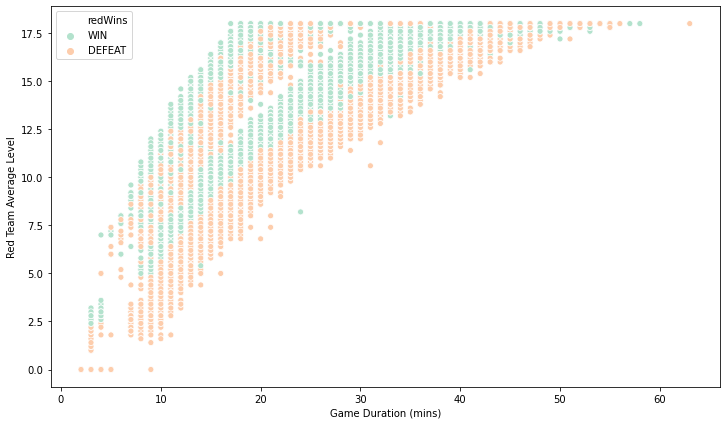

In [159]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['gameDurationMins'], y=df['redAvgLevel'], hue=df['redWins'], palette="Pastel2")
plt.xlabel("Game Duration (mins)")
plt.ylabel("Red Team Average Level")
plt.show()

## Baron, um objetivo *game changing*

O baron é um objetivo no mapa que quando abatido por um time concede a todos os seus membros 300 de ouro, buffs por 3 minutos nos status de todos os personagens do time e fortalece todas as tropas próximas aos personagens do time ao longo do mapa.
Queríamos verificar a taxa de efetividade que esse objetivo tinha nas vitórias, uma vez conquistado, pois esse objetivo é conhecido na comunidade como um objetivo que pode virar partidas ou desequilibrar aquelas partidas que estão em embate equivalente, tendo em vista a força dos buffs que este objetivo entrega.

### Análise no lado azul

In [160]:
# Let us group data by first baron claiming and then count every occurrence
blue_f_baron = df.groupby('blueFirstBaron')['blueWins'].value_counts()
red_f_baron = df.groupby('redFirstBaron')['redWins'].value_counts()

<function matplotlib.pyplot.show(*args, **kw)>

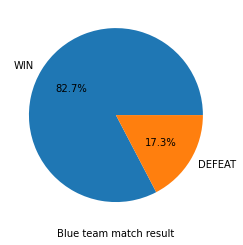

In [161]:
# Teams that claimed baron defeat and have actually won the match
blue_f_baron[1].plot.pie(autopct='%1.1f%%')
plt.xlabel("Blue team match result")
plt.ylabel("")
plt.show

### Análise no lado vermelho

<function matplotlib.pyplot.show(*args, **kw)>

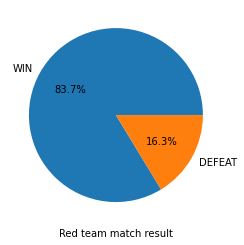

In [162]:
# Teams that claimed baron defeat and have actually won the match
red_f_baron[1].plot.pie(autopct='%1.1f%%')
plt.xlabel("Red team match result")
plt.ylabel("")
plt.show

Isto mostra que SIM! Lutar pelo baron no jogo impacta fortemente na sua chance de vitória, não importando seu lado. 

In [79]:
# Undo categorical mapping to boolean values
columns = ['redWins', 'blueWins']

inv_win_mapping = {v: k for k, v in win_mapping.items()}

for col in columns:
    df[col] = df[col].map(inv_win_mapping)

## Análise de correlação

Podemos agora realizar uma análise de correlação de atributos sobre a vitória em duas perspectivas: a primeira é **um time ser o primeiro a adquirir um objetivo** e a segunda em relação a **estatísticas gerais de jogo**.

Façamos a seleção dos atributos necessários para as duas análises:

In [ ]:
blue_first_columns = ['blueWins', 'blueFirstBlood', 'blueFirstTower', 'blueFirstDragon', 'blueFirstBaron', 'blueFirstInhibitor']

blue_amount_columns = [
    'blueWins', 'blueKills', 'blueDeath', 'blueAssist', 'blueTowerKills', 'blueInhibitorKills', 'blueDragonKills', 'blueBaronKills',  'blueWardPlaced', 
    'blueWardkills', 'blueChampionDamageDealt', 'blueObjectDamageDealt', 'blueTotalGold', 'blueTotalMinionKills',  'blueTotalLevel', 'blueJungleMinionKills', 
    'blueKillingSpree', 'blueTotalHeal', 
] 

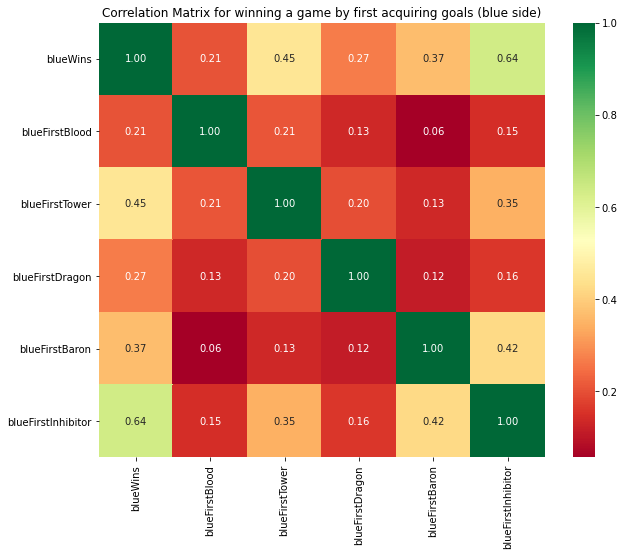

In [81]:
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix for winning a game by first acquiring goals (blue side)")
data = df[df['ranking'] == 'challenger'][blue_first_columns]
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap="RdYlGn")

Analisando sob a primeira perspectiva, vemos que ser o primeiro a derrubar a estrutura do *Inhibitor* possui mais alta probabilidade de vencer. O que confere como verdade, uma vez em que ele é um dos objetivos centrais do jogo. Mais adiante, podemos ver que derrubar a primeira torre e derrotar o primeiro *baron* contam para a vitória, mas não de maneira tão forte como antes. As outras conquistas (ser o primeiro a matar um campeão inimigo e ser o primeiro time a derrotar o dragão)  parecem ser quase irrelevantes para a conquista da vitória.

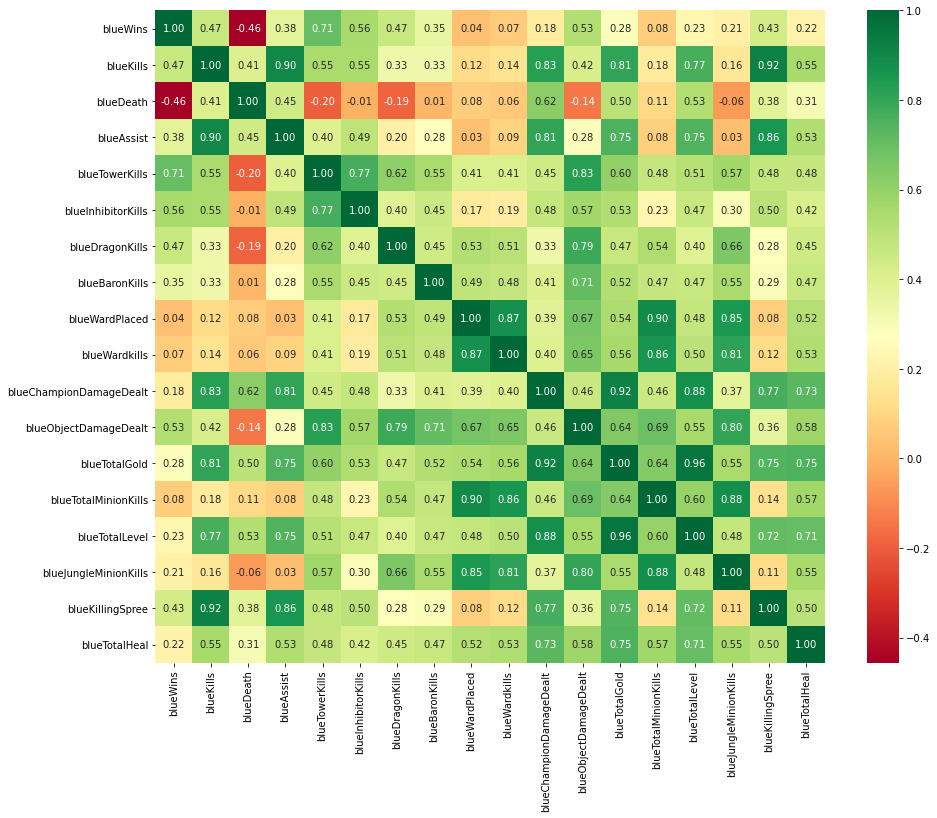

In [82]:
plt.figure(figsize=(15, 12))
data = df[df['ranking'] == 'challenger'][blue_amount_columns]
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap="RdYlGn")

Pondo em vista a segunda perspectiva, do tipo quantitativa, podemos ver que "matar muito" conta positivamente, enquanto que "morrer muito" pesa negativamente, ou seja, é provável que um time azul em que os jogadores morram muito vençam, mas é baixa esta probabilidade. O inverso vale para os jogadores que matam muito os jogadores do time vermelho (é alta a probabilidade de vencerem, apesar de não ser garantida).

Vemos claramente que focar nos objetivos do jogo contam *ainda* mais do que matar os jogadores do time vermelho (inimigo): derrubar *towers*, *inhibitors*, estruturas (representado por *ObjectDamageDealt*) e derrotar inimigos épicos (*dragon* e *baron*), que são também objetivos de jogo, conta ainda mais para a vitória. Ou seja, *foque as torres!* rs

Podemos tirar conclusões similares para o lado vermelho (ou seja, são informações importantes que são irrelevantes quanto ao time em que você está):

In [83]:
red_first_columns = ['redWins', 'redFirstBlood', 'redFirstTower', 'redFirstDragon', 'redFirstBaron', 'redFirstInhibitor']

red_amount_columns = [
    'redWins', 'redKills', 'redDeath', 'redAssist', 'redTowerKills', 'redInhibitorKills', 'redDragonKills', 'redBaronKills',  'redWardPlaced', 
    'redWardkills', 'redChampionDamageDealt', 'redObjectDamageDealt', 'redTotalGold', 'redTotalMinionKills',  'redTotalLevel', 'redJungleMinionKills', 
    'redKillingSpree', 'redTotalHeal', 
]

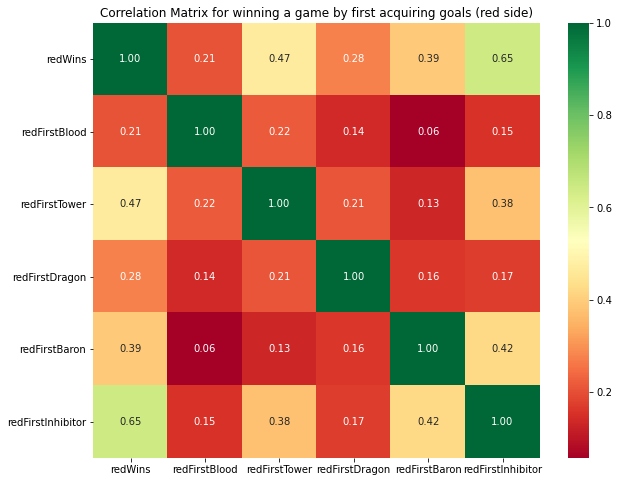

In [84]:
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix for winning a game by first acquiring goals (red side)")
data = df[red_first_columns]
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap="RdYlGn")

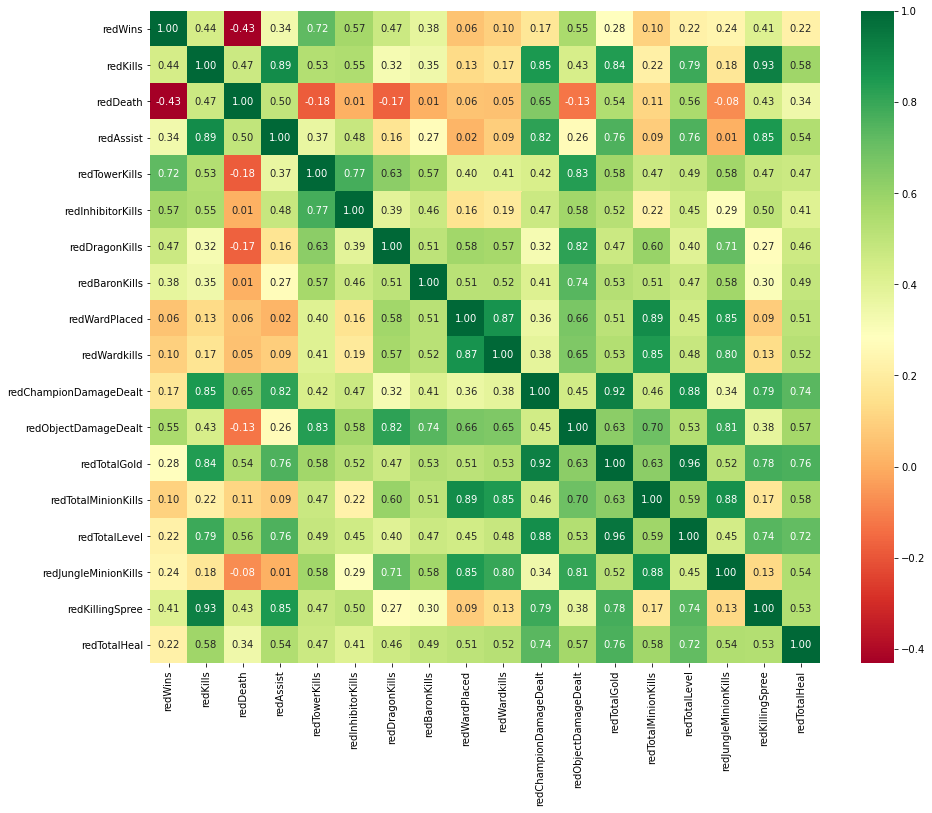

In [85]:
plt.figure(figsize=(15, 12))
data = df[red_amount_columns]
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap="RdYlGn")

Notamos também que, não importando o lado, valorizar a derrota do Dragão conta um pouco mais do que a do Barão em relação à vitória. Esta é uma dúvida recorrente de alguns jogadores, uma vez em que alguns erros de *call* de jogadas são cometidas quanto à indecisão desses dois objetivos. 

## Controle de visão impacta no jogo?

Nem todo o mapa é acessível (pelo menos visivelmente) a todos os jogadores. Existem certas áreas que passam despercebidas aos jogadores (de ambos os lados). A maior parte delas fica na região chamada *jungle*, em que a névoa e as sombras cobrem toda a região. Mas estas áreas podem ser monitoradas com as sentinelas de visão (*wards*), que tornam visível, sob um certo alcance, essas áreas para os jogadores do time que a utilizarem (o time inimigo não consegue ver a não ser que posicione as suas próprias sentinelas!)

Essas sentinelas ficam invisíveis aos olhos do time inimigo, mas podem ser reveladas utilizando itens específicos do jogo que mostram sua localização temporariamente. Ou seja, um time pode remover as *wards* do time inimigo e vice-versa, negando visão ao time inimigo. Esta dinâmica é o chamado *controle de visão do mapa*.

Podemos ver o percentual de partidas em que **nenhuma** sentinela foi usada, independente do ranking dos jogadores:

In [170]:
# Percentual of matches with NO wards placed (elo-agnostic)
((df[df['redWardPlaced'] == 0].shape[0]/df.shape[0])*100)+((df[df['blueWardPlaced'] == 0].shape[0]/df.shape[0])*100)

17.202865796006694

Ou seja, em quase 1/5 das partidas o mapa ficou escuro! Será que isso é um erro grave?

Podemos visualizar as sentinelas postas por um time em comparação com as retiradas (por esse mesmo time) do time inimigo.

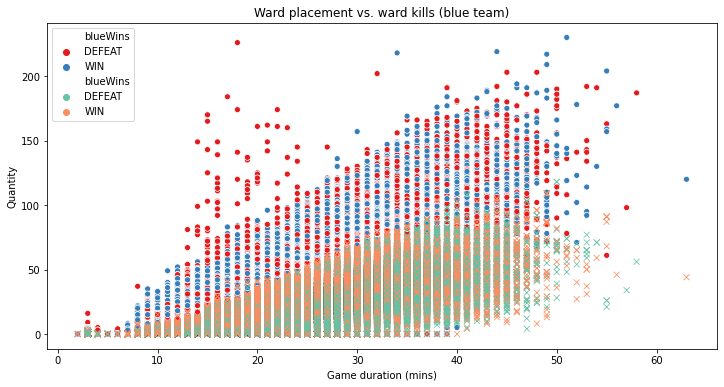

<Figure size 1296x864 with 0 Axes>

In [185]:
columns = ['blueWardPlaced', 'blueWardkills']
palettes = ['Set1', 'Set2']
markers = ['o', 'x']

fig, ax = plt.subplots(figsize=(12, 6))

for i, col in enumerate(columns):
    sns.scatterplot(x=df['gameDurationMins'], y=df[col], hue=df['blueWins'], palette=palettes[i], marker=markers[i])

ax.set_title("Ward placement vs. ward kills (blue team)")
# fig.legend()
plt.xlabel("Game duration (mins)")
plt.ylabel("Quantity")
plt.figure(figsize=(18, 12))
plt.show()

# EXPLANATION
# Here dot represents wards placed where cross represents wards kills:

As pessoas possuem a tendência a assegurar pontos de visão em dentrimento de negar visão ao time inimigo. Essa tendência se acentua conforme o jogo vai ficando tardio.

## Análise de habilidade do time por *ranking*

Podemos fazer uma análise sem viés de lado de atributos gerais de jogo, para cada time. Como os dados estão divididos, temos que criar novos atributos para o caso geral:

In [206]:
# Selecting individual attributes per team
individual_blue_att_columns = ['blueKills', 'blueDeath', 'blueAssist', 
                              'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalMinionKills']
individual_red_att_columns = ['redKills', 'redDeath', 'redAssist', 
                              'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills']

# New ones
individual_att_columns = ['kills', 'deaths', 'assists', 
                              'championDamageDealt', 'totalGold', 'totalMinionKills']

for i, col in enumerate(individual_att_columns):
    df[col] = df[individual_blue_att_columns[i]] + df[individual_red_att_columns[i]]

In [207]:
# Attributes mean grouped by ranking
info_by_rank = df.groupby('ranking')[individual_att_columns].mean().reset_index()
info_by_rank

,ranking,kills,deaths,assists,championDamageDealt,totalGold,totalMinionKills
0,challenger,47.667305,47.823053,79.408900,138026.892353,95718.294950,1048.654510
1,grandmaster,49.029369,49.200359,82.092124,138655.194105,95572.801573,1004.541632
2,master,48.657365,48.829768,79.296012,136371.986061,94833.778555,998.699493


In [215]:
# Grouping ranking values and computing their minimum
min_df = df.groupby('ranking')[individual_att_columns].min().reset_index()
min_df = min_df[individual_att_columns]

# Grouping ranking values and computing their maximum
max_df = df.groupby('ranking')[individual_att_columns].max().reset_index()
max_df = max_df[individual_att_columns]

mean_df = info_by_rank[individual_att_columns]

# Scaling all the features
scaled = (mean_df.values - min_df.values)/(max_df.values - min_df.values)

info_by_rank_scaled = pd.DataFrame(scaled, columns=individual_att_columns)
info_by_rank_scaled.insert(loc=0, column='ranking', value=info_by_rank['ranking'])

info_by_rank_scaled

,ranking,kills,deaths,assists,championDamageDealt,totalGold,totalMinionKills
0,challenger,0.256276,0.255738,0.182970,0.206491,0.389859,0.384459
1,grandmaster,0.247623,0.247238,0.185729,0.228055,0.385554,0.412039
2,master,0.261599,0.261122,0.177000,0.205669,0.368293,0.350000


Podemos plotar um gráfico para visualizar esses atributos um ao lado do outro:

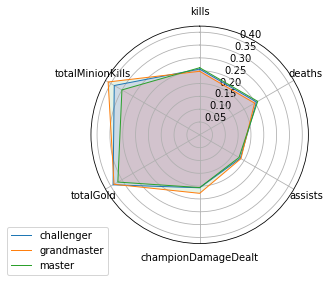

<Figure size 720x720 with 0 Axes>

In [216]:
categories = list(info_by_rank_scaled)[1:]
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

values = info_by_rank_scaled.loc[0].drop('ranking').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='challenger')
ax.fill(angles, values, 'b', alpha=0.1)

values = info_by_rank_scaled.loc[1].drop('ranking').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='grandmaster')
ax.fill(angles, values, 'g', alpha=0.1)

values = info_by_rank_scaled.loc[2].drop('ranking').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='master')
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.figure(figsize=(10, 10))
plt.show()

A disposição de dados é diferente para cada *ranking*, mas difere mais sobre o número de tropas abatidas (*minionKills*) e do total de ouro adquirido. Quanto maior o ranking, maior estes atributos nas partidas analisadas. Os outros atributos parecem ser indiferentes quanto ao nível da partida.